# Linear regression and gradient descent

In [1]:
import numpy as np

def make_linear_regression_model(theta):
    def f(x):
        # y = theta[0]*x[0] + theta[1]*x[1] + ... + theta[n-1]*x[n-1]
        return np.dot(theta, x)
    return f

model = make_linear_regression_model([2, 3])
print(model([1, 5])) # =1*2 + 3*5

17


In [2]:
def cost(model, xs, ys):
    sum = 0
    for i in range(0, len(xs)):
        sum += (model(xs[i]) - ys[i]) ** 2
    return sum / len(xs)

import numpy as np

number_of_samples = 100
xs = np.random.rand(number_of_samples, 1)
xs = np.insert(xs, 0, 1, 1)

ys = 3*xs[:, 1] + 7 #+ np.random.rand(number_of_samples)*0.5

cost(make_linear_regression_model([7, 3]), xs, ys)

0.0

In [3]:
def naive_cost_derivative_calculator(make_model, dtheta):
    def f(theta, xs, ys):
        num_of_parameters = len(theta)
        cost_derivative_value = np.zeros(num_of_parameters)
        for theta_index in range(num_of_parameters):
            theta_left = np.copy(theta)
            theta_left[theta_index] -= dtheta / 2 
            left_model = make_model(theta_left)
            left_cost = cost(left_model, xs, ys)
            
            theta_right = np.copy(theta)
            theta_right[theta_index] += dtheta / 2 
            right_model = make_model(theta_right)
            right_cost = cost(right_model, xs, ys)
            
            cost_derivative_value[theta_index] = (right_cost - left_cost) / dtheta
        return cost_derivative_value
    return f

def linear_regression_model_cost_derivative_calculator():
    def f(theta, xs, ys):
        # (1/m) * (X' * (X * theta - y))        
        return (np.matmul(np.transpose(xs), (np.matmul(xs, theta) - ys))) / xs.shape[0]
    return f

def gradient_descent(cost_derivative_f, rate, iterations, xs, ys):
    num_of_samples = np.array(xs).shape[0]
    num_of_parameters = np.array(xs).shape[1]
    theta = np.zeros(num_of_parameters)
    history = []
    for i in range(0, iterations):
        cost_derivative_value = cost_derivative_f(theta, xs, ys)            
        theta -= rate * (1/num_of_samples) * cost_derivative_value
        history.append((i, np.copy(theta)))
        
    return history

[6.95900002 3.07519776]


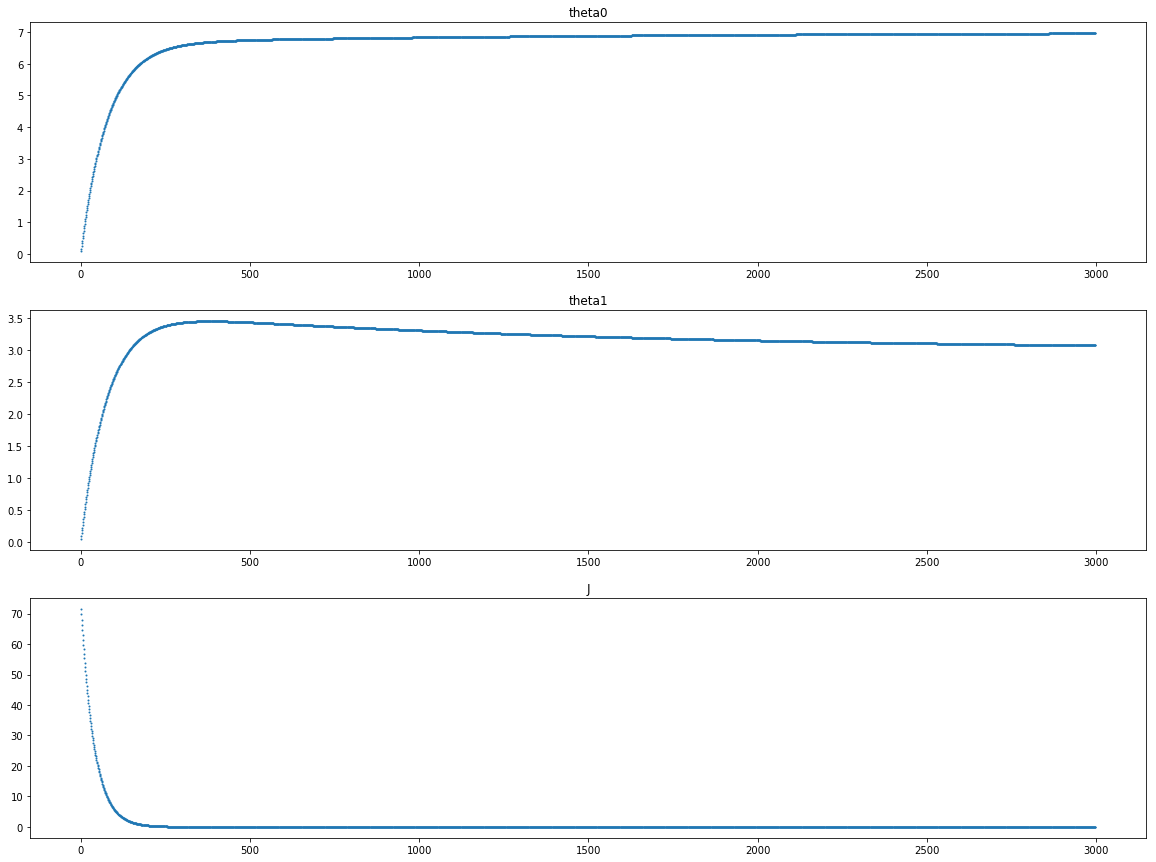

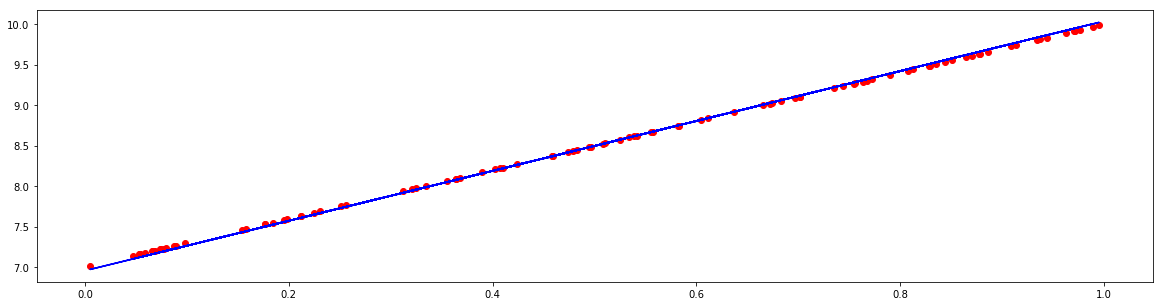

In [5]:
cost_derivative_f1=naive_cost_derivative_calculator(
    make_model=make_linear_regression_model,
    dtheta=0.01)

cost_derivative_f2=linear_regression_model_cost_derivative_calculator()

history = gradient_descent(
    cost_derivative_f=cost_derivative_f2,
    rate=1,
    iterations=3000, 
    xs=xs, 
    ys=ys)

(_, theta) = history[-1]
print(theta)

import matplotlib.pyplot as plt

plt.figure(figsize=(20, 15))

plt.subplot(3, 1, 1)
plt.title('theta0')
plt.scatter([h[0] for h in history], [h[1][0] for h in history], s=1)

plt.subplot(3, 1, 2)
plt.title('theta1')
plt.scatter([h[0] for h in history], [h[1][1] for h in history], s=1)

plt.subplot(3, 1, 3)
plt.title('J')
plt.scatter([h[0] for h in history], [cost(make_linear_regression_model(h[1]), xs, ys) for h in history], s=1)

plt.show()


plt.figure(figsize=(20, 5))
plt.scatter(xs[:, 1], ys, color='r')
plt.plot(xs[:, 1], [theta[0]+theta[1]*x for x in xs[:, 1]], color='b')
plt.show()